<a href="https://colab.research.google.com/github/harinadh01/cyberbulling-/blob/main/Cyberbulling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving final_dataset.csv to final_dataset.csv


In [13]:
import pandas as pd

In [20]:
df = pd.read_csv("final_dataset.csv")

In [21]:
df

,text_content,labels
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1
...,...,...
19996,I dont. But what is complaining about it goi...,0
19997,Bahah yeah i&;m totally just gonna&; get pis...,0
19998,hahahahaha >:) im evil mwahahahahahahahahaha,0
19999,What&;s something unique about Ohio? :),0


In [22]:
print(df.columns)


Index(['text_content', 'labels'], dtype='object')


In [23]:
print(df.loc[4])


text_content     WTF are you talking about Men? No men thats n...
labels                                                          1
Name: 4, dtype: object


In [25]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text_content  20001 non-null  object
 1   labels        20001 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [27]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
import nltk
nltk.download('punkt')        # for word_tokenize
nltk.download('stopwords')    # for stopwords.words
nltk.download('wordnet')      # for WordNetLemmatizer
nltk.download('omw-1.4')      # OPTIONAL but often needed for WordNet


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [37]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd
import re
import nltk

# Download necessary NLTK resources
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load dataset
df = pd.read_csv("final_dataset.csv")

# Define preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into a single string
    return ' '.join(tokens)

# Apply preprocessing
df['cleaned_text'] = df['text_content'].apply(preprocess_text)

# Define features and labels
X = df['cleaned_text']
y = df['labels']

# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Now you can use X_train_resampled and y_train_resampled to train your model


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Store model results
results = {}

# Classical ML Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Naive Bayes": MultinomialNB()
}

print("=== Training Classical Models ===")
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"\n{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

# ANN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score
# Build the ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    Dropout(0.5),  # Prevent overfitting
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Use sigmoid for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


=== Training Classical Models ===

Logistic Regression Accuracy: 0.7863
              precision    recall  f1-score   support

           0       0.87      0.77      0.81      2424
           1       0.69      0.82      0.75      1577

    accuracy                           0.79      4001
   macro avg       0.78      0.79      0.78      4001
weighted avg       0.80      0.79      0.79      4001


Random Forest Accuracy: 0.8800
              precision    recall  f1-score   support

           0       0.97      0.83      0.89      2424
           1       0.78      0.96      0.86      1577

    accuracy                           0.88      4001
   macro avg       0.88      0.89      0.88      4001
weighted avg       0.90      0.88      0.88      4001


SVM Accuracy: 0.9245
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      2424
           1       0.89      0.93      0.91      1577

    accuracy                           0.92      4001
  

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 18s 33ms/step - accuracy: 0.6389 - loss: 0.6235 - val_accuracy: 0.5951 - val_loss: 0.7045
Epoch 2/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.8648 - loss: 0.3283 - val_accuracy: 0.6430 - val_loss: 0.8627
Epoch 3/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.9403 - loss: 0.1646 - val_accuracy: 0.7040 - val_loss: 0.7826
Epoch 4/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.9681 - loss: 0.1013 - val_accuracy: 0.7114 - val_loss: 0.8758
Epoch 5/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.9793 - loss: 0.0647 - val_accuracy: 0.7227 - val_loss: 0.8322
Epoch 6/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9845 - loss: 0.0488 - val_accuracy: 0.7391 - val_loss: 0.7761
Epoch 7/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9860 - loss: 0.0418 - val_accuracy: 0.7535 - val_loss: 0.6983
Epoch 8/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.9872 - loss: 0.0381 - 

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score
# Build the ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    Dropout(0.5),  # Prevent overfitting
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Use sigmoid for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.6373 - loss: 0.6278 - val_accuracy: 0.6504 - val_loss: 0.6283
Epoch 2/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.8750 - loss: 0.3146 - val_accuracy: 0.6704 - val_loss: 0.7450
Epoch 3/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.9432 - loss: 0.1603 - val_accuracy: 0.6899 - val_loss: 0.8852
Epoch 4/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.9684 - loss: 0.0926 - val_accuracy: 0.7004 - val_loss: 0.9600
Epoch 5/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.9772 - loss: 0.0678 - val_accuracy: 0.7019 - val_loss: 0.9922
Epoch 6/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.9859 - loss: 0.0481 - val_accuracy: 0.7022 - val_loss: 0.9806
Epoch 7/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.9861 - loss: 0.0415 - val_accuracy: 0.7394 - val_loss: 0.7109
Epoch 8/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9876 - loss: 0.0381 - 

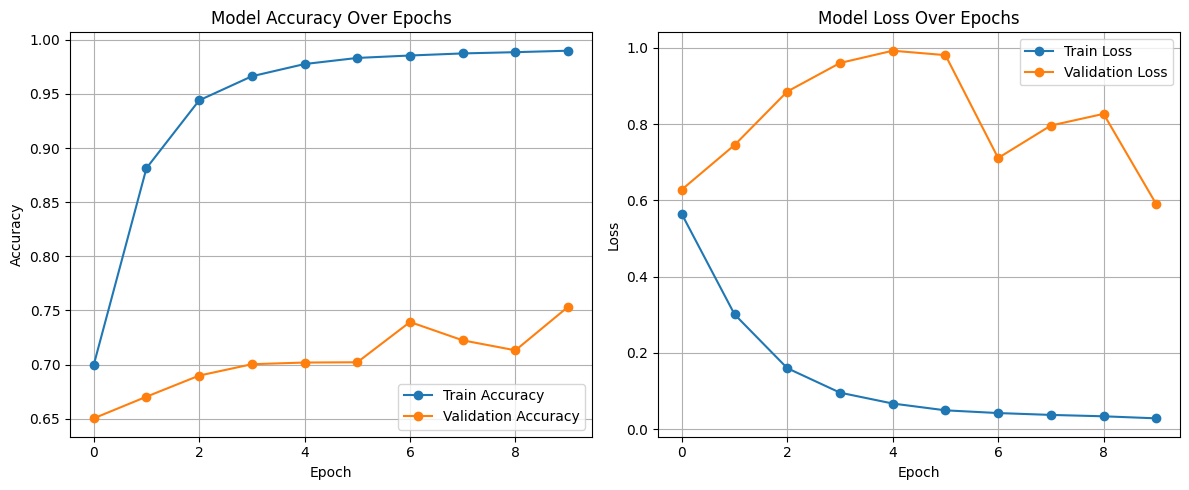

In [49]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [50]:
model.save('ann_model.h5')
import pickle
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Accuracy: 0.9105223694076481
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      2424
           1       0.84      0.95      0.89      1577

    accuracy                           0.91      4001
   macro avg       0.90      0.92      0.91      4001
weighted avg       0.92      0.91      0.91      4001



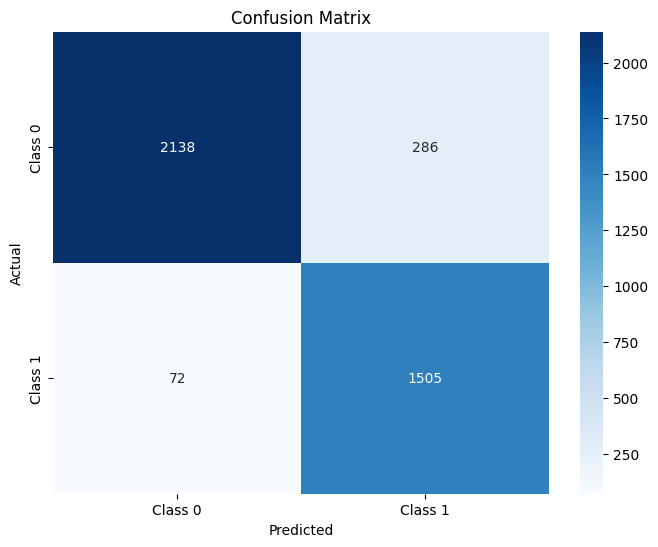

In [51]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [53]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 92.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.5 MB/s eta 0:00:00


In [54]:
import gradio as gr
from tensorflow.keras.models import load_model
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Ensure NLTK resources are downloaded
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the trained model
model = load_model('ann_model.h5')  # Save your model as 'ann_model.h5' after training

# Load the vectorizer
with open('tfidf_vectorizer.pkl', 'rb') as file:
    vectorizer = pickle.load(file)  # Save your vectorizer as 'tfidf_vectorizer.pkl'

# Define text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into a single string
    return ' '.join(tokens)

# Define prediction function
def predict_sentiment(input_text):
    # Preprocess the input text
    cleaned_text = preprocess_text(input_text)
    # Convert text to numerical features using the vectorizer
    vectorized_text = vectorizer.transform([cleaned_text])
    # Predict using the ANN model
    prediction = model.predict(vectorized_text.toarray())
    # Map the prediction to a class
    label = "Cyber Bullying Detected" if prediction > 0.5 else "Cyber Bullying Not Detected"
    return f"Prediction: {label} (Confidence: {prediction[0][0]:.2f})"

# Create Gradio interface
interface = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=3, placeholder="Enter your text here..."),
    outputs="text",
    title="Sentiment Analysis",
    description="Enter a piece of text to predict whether the sentiment is Positive or Negative.",
    examples=["I love this product!", "This is the worst experience ever."]
)

# Launch the Gradio app
interface.launch()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://59a9f9b5968c4621d0.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
